In [1]:
import pandas as pd
import seaborn as sns 
sns.set(color_codes=True)
import numpy as np
from matplotlib import pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder

*Data preprocessing*

In [2]:
df = pd.read_csv('GOT_Transform_Batch2_v1.csv',low_memory=False)

In [3]:
df2=df.loc[:, df.columns.drop(['TRNSCR_DESCR', 'MUET','IELTS','NewID'])]
df2.head()


,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,N,DIPL,DC,DISC,"Wednesday, 30 August, 2017",1710,"Monday, 3 July, 2017","Sunday, 5 July, 2020",1930.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,N,UGRD,DC,DISC,"Monday, 2 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,N,UGRD,DC,DISC,"Tuesday, 3 July, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,N,UGRD,DC,DISC,"Monday, 9 April, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,N,UGRD,DC,DISC,"Thursday, 25 January, 2018",1720,"Monday, 20 November, 2017","Sunday, 2 January, 2022",2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
GOT2 ={
    'Y' :1,
    'N' :0
}

df2['GOT2'].replace(GOT2,inplace=True)
df2['GOT2'].astype(str).astype(int)
df2['GOT2']

0       0
1       0
2       0
3       0
4       0
       ..
5483    0
5484    0
5485    0
5486    0
5487    0
Name: GOT2, Length: 5488, dtype: int64

In [5]:
df2.select_dtypes(include = "float64").columns

Index(['EXP_GRAD_TERM', 'CREDITREQUIRED', 'CNT_DISC', 'TOT_TRNSFR',
       'T1:CUR_GPA', 'T1:CUM_GPA', 'T2:CUR_GPA', 'T2:CUM_GPA',
       'T2:UNT_TAKEN_GPA', 'T2:UNT_TAKEN_NOGPA',
       ...
       'T16:UNT_PASSD_GPA', 'T16:UNT_PASSD_NOGPA', 'T16:TOT_PASSD_GPA',
       'T17:CUR_GPA', 'T17:CUM_GPA', 'T17:UNT_TAKEN_GPA',
       'T17:UNT_TAKEN_NOGPA', 'T17:UNT_PASSD_GPA', 'T17:UNT_PASSD_NOGPA',
       'T17:TOT_PASSD_GPA'],
      dtype='object', length=118)

In [6]:
objList2 = df2.select_dtypes(include = "object").columns
print (objList2)
df2[objList2].isnull().sum()

Index(['ACAD_CAREER', 'PROG_STATUS', 'PROG_ACTION', 'STATUS_DT', 'BEGIN_DT',
       'END_DT', 'CAMPUS', 'SAD_LOAD_DESCR', 'ACAD_PLAN', 'ACAD_PROG_DESCR',
       'ACAD_ORG', 'DISABILITY', 'NATIONALITY', 'RACE', 'SEX', 'LOAN',
       'SPONSOR', 'SCHOLAR', 'N_FINAL_RSLT_DESCR', 'N_HONOUR_DESCR', 'INFO1'],
      dtype='object')


ACAD_CAREER              0
PROG_STATUS              0
PROG_ACTION              0
STATUS_DT                0
BEGIN_DT                 0
END_DT                  39
CAMPUS                   0
SAD_LOAD_DESCR           0
ACAD_PLAN                0
ACAD_PROG_DESCR          0
ACAD_ORG                 0
DISABILITY               3
NATIONALITY              0
RACE                     2
SEX                      0
LOAN                  5437
SPONSOR               4944
SCHOLAR               5465
N_FINAL_RSLT_DESCR       1
N_HONOUR_DESCR          86
INFO1                  195
dtype: int64

In [7]:
objList3 = df2.select_dtypes(include = "float64").columns
df2[objList3].isnull().sum()

EXP_GRAD_TERM            39
CREDITREQUIRED            1
CNT_DISC               5089
TOT_TRNSFR             4355
T1:CUR_GPA                0
                       ... 
T17:UNT_TAKEN_GPA      5486
T17:UNT_TAKEN_NOGPA    5486
T17:UNT_PASSD_GPA      5486
T17:UNT_PASSD_NOGPA    5486
T17:TOT_PASSD_GPA      5486
Length: 118, dtype: int64

In [8]:
df2[objList3] = df2[objList3].fillna(0)
df2[objList3].isnull().sum()

EXP_GRAD_TERM          0
CREDITREQUIRED         0
CNT_DISC               0
TOT_TRNSFR             0
T1:CUR_GPA             0
                      ..
T17:UNT_TAKEN_GPA      0
T17:UNT_TAKEN_NOGPA    0
T17:UNT_PASSD_GPA      0
T17:UNT_PASSD_NOGPA    0
T17:TOT_PASSD_GPA      0
Length: 118, dtype: int64

*Label Encoding*

In [9]:
le = LabelEncoder()

for feat in objList2:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5488 entries, 0 to 5487
Columns: 154 entries, MAX_STRM_id to T17:TOT_PASSD_GPA
dtypes: float64(118), int32(21), int64(15)
memory usage: 6.0 MB
None


In [10]:
df2.head()

,MAX_STRM_id,GOT2,ACAD_CAREER,PROG_STATUS,PROG_ACTION,STATUS_DT,ADMIT_TERM,BEGIN_DT,END_DT,EXP_GRAD_TERM,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,1,0,0,3,3,458,1710,4,18,1930.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,3,3,3,129,1720,2,10,2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,3,3,3,369,1720,2,10,2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,3,3,3,185,1720,2,10,2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,3,3,3,269,1720,2,10,2110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_drop_unuse = df2.drop(['MAX_STRM_id', 'PROG_STATUS', 'PROG_ACTION', 'STATUS_DT', 'END_DT', 'CNT_DISC','INFO1','Prog_Length(Trimester)','TOT_CUMULATIVE','N_FINAL_RSLT_DESCR','N_HONOUR_DESCR'], axis=1)
df_drop_unuse.head()

,GOT2,ACAD_CAREER,ADMIT_TERM,BEGIN_DT,EXP_GRAD_TERM,CAMPUS,SAD_LOAD_DESCR,ACAD_PLAN,ACAD_PROG_DESCR,ACAD_ORG,...,T16:UNT_PASSD_GPA,T16:UNT_PASSD_NOGPA,T16:TOT_PASSD_GPA,T17:CUR_GPA,T17:CUM_GPA,T17:UNT_TAKEN_GPA,T17:UNT_TAKEN_NOGPA,T17:UNT_PASSD_GPA,T17:UNT_PASSD_NOGPA,T17:TOT_PASSD_GPA
0,0,0,1710,4,1930.0,1,0,27,45,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3,1720,2,2110.0,1,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3,1720,2,2110.0,1,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3,1720,2,2110.0,1,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,1720,2,2110.0,1,0,0,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_drop_unuse['GOT2'].value_counts()

1    2934
0    2554
Name: GOT2, dtype: int64

In [13]:
NewGOT2 = df_drop_unuse.loc[df_drop_unuse['GOT2'] == 1]
NewGOT2 = NewGOT2.iloc[:2554]
NewGOT2_No = df_drop_unuse.loc[df_drop_unuse['GOT2'] == 0]
NewGOT2 = NewGOT2.append(NewGOT2_No)
NewGOT2['GOT2'].value_counts()

C:\Users\about\AppData\Local\Temp\ipykernel_17192\371176306.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  NewGOT2 = NewGOT2.append(NewGOT2_No)


1    2554
0    2554
Name: GOT2, dtype: int64

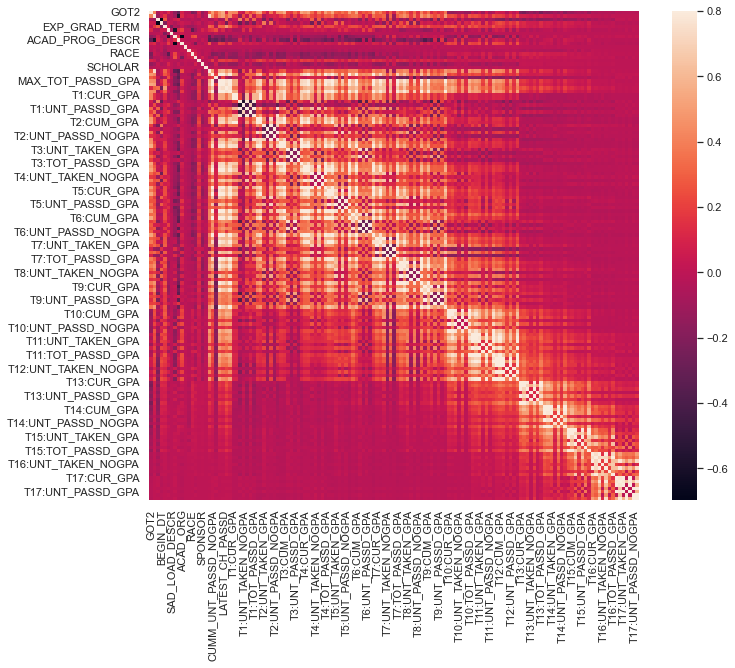

In [14]:
corrmat = NewGOT2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

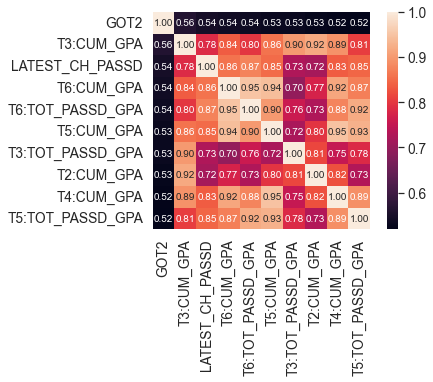

In [15]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'GOT2')['GOT2'].index
cm = np.corrcoef(NewGOT2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import csv
from sklearn.model_selection import cross_val_score

*Feature Selection*

154
---------Top 10----------
              Features  Score
0          ACAD_CAREER    1.0
60    T6:UNT_TAKEN_GPA    1.0
88   T10:UNT_TAKEN_GPA    1.0
87         T10:CUM_GPA    1.0
86         T10:CUR_GPA    1.0
85    T9:TOT_PASSD_GPA    1.0
84  T9:UNT_PASSD_NOGPA    1.0
83    T9:UNT_PASSD_GPA    1.0
82  T9:UNT_TAKEN_NOGPA    1.0
81    T9:UNT_TAKEN_GPA    1.0
---------Bottom 10----------
                Features  Score
137    T17:UNT_TAKEN_GPA    0.0
140  T17:UNT_PASSD_NOGPA    0.0
139    T17:UNT_PASSD_GPA    0.0
138  T17:UNT_TAKEN_NOGPA    0.0
132    T16:UNT_PASSD_GPA    0.0
136          T17:CUM_GPA    0.0
133  T16:UNT_PASSD_NOGPA    0.0
131  T16:UNT_TAKEN_NOGPA    0.0
130    T16:UNT_TAKEN_GPA    0.0
141    T17:TOT_PASSD_GPA    0.0


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

NB acc=  69.56383838383839
DT acc=  94.23676767676767
KNN acc=  97.52777777777777
SVM acc=  82.90262626262626
RFC acc=  88.91050505050508
LOR acc=  97.77616161616162


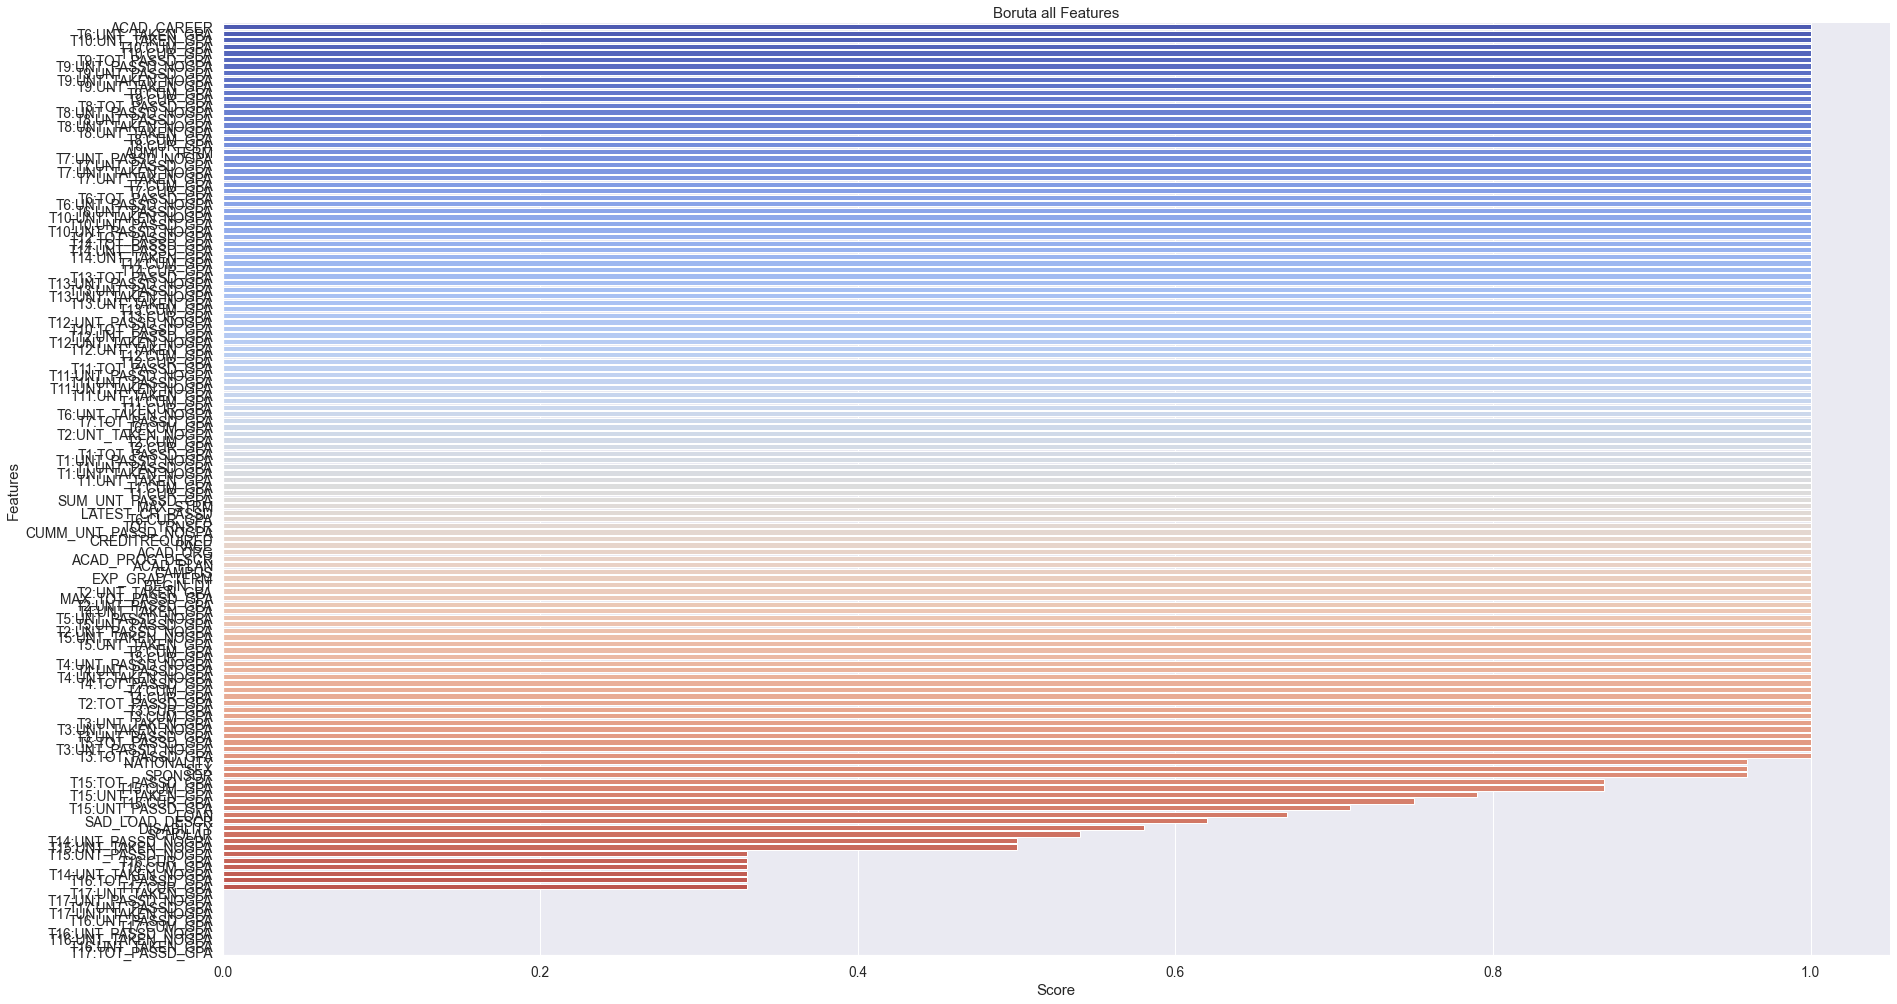

In [17]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

print(len(df2.columns))

y = NewGOT2.GOT2
X = NewGOT2.drop("GOT2", axis=1)
colnames = X.columns

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(
    verbose=0,
    estimator=model,
    n_estimators='auto',
    max_iter=100  # number of iterations to perform
)



feat_selector.fit(X.values, y)

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
print(boruta_score.head(10))

print('---------Bottom 10----------')
print(boruta_score.tail(10))

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta all Features")

model_list = ["NB", "DT", "KNN", "SVM", "RFC", "LOR"]
feature_num, acc_nb, acc_dt, acc_knn, acc_svm, acc_rfc, acc_lor = [], [], [], [], [], [], []

for i in range(1, 100):
    feature_num.append(i)
    for model in model_list:
        
        # Create X and y dataset
        
        y = NewGOT2.GOT2
        X = NewGOT2.drop("GOT2", axis=1)
        
        cols = boruta_score.Features.iloc[:]
        X = X[cols].copy()
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
        if model == "NB":
            clf = GaussianNB()
        elif model == "DT":
            clf = DecisionTreeClassifier(max_depth=3) 
        elif model == "KNN":
            clf = KNeighborsClassifier(n_neighbors=3)
        elif model == "SVM":
            clf = svm.SVC()
        elif model == 'RFC':
            clf = RandomForestClassifier(max_depth=3)
        elif model == 'LOR':
            clf = LogisticRegression(max_iter=200)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = round((accuracy_score(y_test, y_pred)*100), 2)
        
        if model == "NB":
            acc_nb.append(acc)
        elif model == "DT":
            acc_dt.append(acc) 
        elif model == "KNN":
            acc_knn.append(acc)
        elif model == "SVM":
            acc_svm.append(acc)
        elif model == "RFC":
            acc_rfc.append(acc)
        elif model == "LOR":
            acc_lor.append(acc) 
            
# your codes here...
boruta_acc_result = pd.DataFrame(list(zip(feature_num,
                                         acc_nb,
                                         acc_dt,
                                         acc_knn,
                                         acc_svm,
                                         acc_rfc,
                                         acc_lor)),
                                columns = ["No_Of_Features",
                                          "NB",
                                          "DT",
                                          "KNN",
                                          "SVM",
                                          "RFC",
                                          "LOR"])

print("NB acc= ",boruta_acc_result['NB'].mean())
print("DT acc= ",boruta_acc_result['DT'].mean())
print("KNN acc= ",boruta_acc_result['KNN'].mean())
print("SVM acc= ",boruta_acc_result['SVM'].mean())
print("RFC acc= ",boruta_acc_result['RFC'].mean())
print("LOR acc= ",boruta_acc_result['LOR'].mean())

boruta_acc_result = pd.melt(boruta_acc_result,
                           id_vars = "No_Of_Features",
                           var_name = "Model",
                           value_name = "Accuracy")

<AxesSubplot: >

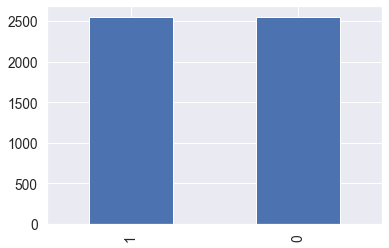

In [18]:
NewGOT2['GOT2'].value_counts().plot(kind='bar')

*Modelling & Model Evaluation*

1    2554
0    2554
Name: GOT2, dtype: int64
1    2554
0    2554
Name: GOT2, dtype: int64
rf_SMOTE Accuracy Score: 0.9882583170254403
svc_SMOTE Accuracy Score: 0.8365949119373777
kn_SMOTE Accuracy Score: 0.9608610567514677
DecisionTree_SMOTE Accuracy Score: 0.9941291585127201
gnb_SMOTE Accuracy Score: 0.7113502935420744


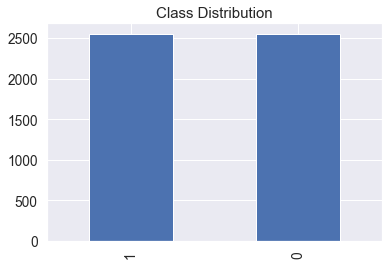

In [19]:
print(NewGOT2["GOT2"].value_counts())
NewGOT2["GOT2"].value_counts().plot(kind="bar")
plt.title("Class Distribution")


X = NewGOT2.drop("GOT2", axis=1)
y = NewGOT2["GOT2"]
features = X.columns

print(y.value_counts())
y.value_counts().plot(kind="bar")
plt.title("Class Distribution")

#-------------------------------------------------------------

#split SMOTE data in XY
y = NewGOT2.GOT2
X = NewGOT2.drop("GOT2", axis=1)

cols = boruta_score.Features.iloc[:]
X = X[cols].copy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#-------------------------------------------------------------

#Train and do prediction with default parameter
#RandomForest
rf_SMOTE = RandomForestClassifier()
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)
print("rf_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#SVM
svc_SMOTE = SVC(kernel='rbf')
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#knn
kn_SMOTE = KNeighborsClassifier()
kn_SMOTE.fit(X_train, y_train)
ypred = kn_SMOTE.predict(X_test)
print("kn_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#Decission Tree
dtc_SMOTE = DecisionTreeClassifier()
dtc_SMOTE.fit(X_train, y_train)
ypred = dtc_SMOTE.predict(X_test)
print("DecisionTree_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

#GaussianNB
gnb_SMOTE = GaussianNB()
gnb_SMOTE.fit(X_train, y_train)
ypred = gnb_SMOTE.predict(X_test)
print("gnb_SMOTE Accuracy Score:", accuracy_score(y_test, ypred))

*Hyper parameter*

In [20]:
criterion = ['gini','entropy']
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


rf_SMOTE(Hyperparameter) Accuracy Score: 0.9931506849315068
rf_SMOTE(Hyperparameter) ROC Score: 0.9996017111103452
rf_SMOTE(Hyperparameter) Precision Score: 0.9884169884169884
rf_SMOTE(Hyperparameter) F1 Score: 0.9932104752667313
tree_clas_SMOTE(Hyperparameter) Recall: 0.9980506822612085


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

rf_SMOTE(Hyperparameter) CV Score: [0.86692759 0.8590998  0.84637965 0.94221352 0.42703232]


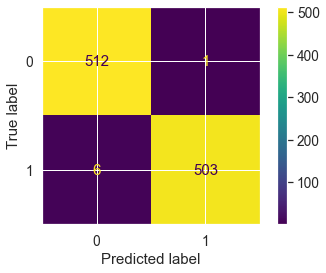

In [21]:
k_folds = KFold(n_splits = 5)

rf_SMOTE = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 30,
 criterion= 'entropy',
 bootstrap= False)
rf_SMOTE.fit(X_train, y_train)
ypred = rf_SMOTE.predict(X_test)


print("rf_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("rf_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, rf_SMOTE.predict_proba(X_test)[:,1]))
print("rf_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(rf_SMOTE, X, y, cv = k_folds))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV] END ..................................C=0.1, kernel=rbf; total time=   2.2s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=   2.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.9s
[CV] END .................................C=0.1, kernel=poly; total time=   1.1s
[CV] END .................................C=0.1, kernel=poly; total time=   1.5s
[CV] END .................................C=0.1, kernel=poly; total time=   1.3s
[CV] END .................................C=0.1, kernel=poly; total time=   1.1s
[CV] END .................................C=0.1, kernel=poly; total time=   1.0s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   2.1s
[CV] END ..............................C=0.1, kernel=sigmoid; total time=   2.1s
[CV] END ...................

svc_SMOTE(Hyperparameter) Accuracy Score: 0.958904109589041
svc_SMOTE(Hyperparameter) Precision Score: 0.9700598802395209
svc_SMOTE(Hyperparameter) F1 Score: 0.9585798816568046
tree_clas_SMOTE(Hyperparameter) Recall: 0.9473684210526315
rf_SMOTE(Hyperparameter) CV Score: [0.99119374 0.87573386 0.55577299 0.89618022 0.49951028]


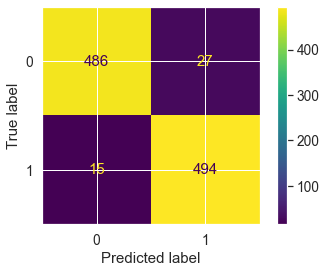

In [23]:
svc_SMOTE = SVC(kernel='poly',C=100)
svc_SMOTE.fit(X_train, y_train)
ypred = svc_SMOTE.predict(X_test)
print("svc_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))

print("svc_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("svc_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
print("rf_SMOTE(Hyperparameter) CV Score:", cross_val_score(svc_SMOTE, X, y, cv = k_folds))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [24]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid.fit(X_train,y_train)

print(grid.best_params_)

accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 97.80%


knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is : 0.974559686888454
knn_SMOTE(Hyperparameter) Accuracy Score: 0.974559686888454
knn_SMOTE(Hyperparameter) ROC Score: 0.9806772443004477
knn_SMOTE(Hyperparameter) Precision Score: 0.9728155339805825
knn_SMOTE(Hyperparameter) F1 Score: 0.9747081712062258
tree_clas_SMOTE(Hyperparameter) Recall: 0.9766081871345029
knn_SMOTE(Hyperparameter) CV Score: [0.71330724 0.7925636  0.81409002 0.834476   0.29872674]


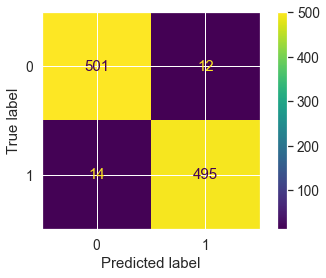

In [25]:
knn_SMOTE = KNeighborsClassifier(n_neighbors=2)
knn_SMOTE.fit(X_train,y_train)
ypred=knn_SMOTE.predict(X_test) 
accuracy=accuracy_score(y_test,ypred)
print("knn_SMOTE(Hyperparameter) Accuracy for our testing dataset with tuning is :",accuracy )
print("knn_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("knn_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, knn_SMOTE.predict_proba(X_test)[:,1]))
print("knn_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
print("knn_SMOTE(Hyperparameter) CV Score:", cross_val_score(knn_SMOTE, X, y, cv = k_folds))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)
plt.show()

In [26]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas_SMOTE, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and

{'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}


c:\Users\about\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


tree_clas_SMOTE(Hyperparameter) Accuracy Score: 0.9941291585127201
tree_clas_SMOTE(Hyperparameter) ROC Score: 0.9941214091767293
tree_clas_SMOTE(Hyperparameter) Precision Score: 0.9922330097087378
tree_clas_SMOTE(Hyperparameter) F1 Score: 0.9941634241245136
tree_clas_SMOTE(Hyperparameter) Recall: 0.9961013645224172
tree_clas_SMOTE(Hyperparameter) CV Score: [0.91682975 0.95988258 0.89041096 0.94025465 0.62193928]


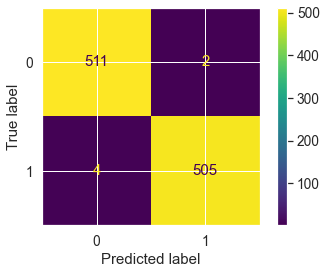

In [27]:
param_grid = {'max_features': 'auto',
              'ccp_alpha': 0.001,
              'max_depth' : 9,
              'criterion' :'entropy'
             }
tree_clas_SMOTE = DecisionTreeClassifier(random_state=1024)
tree_clas_SMOTE.fit(X_train, y_train)
ypred = tree_clas_SMOTE.predict(X_test)
print("tree_clas_SMOTE(Hyperparameter) Accuracy Score:", accuracy_score(y_test, ypred))
print("tree_clas_SMOTE(Hyperparameter) ROC Score:", roc_auc_score(y_test, tree_clas_SMOTE.predict_proba(X_test)[:,1]))
print("tree_clas_SMOTE(Hyperparameter) Precision Score:", precision_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) F1 Score:", f1_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) Recall:", recall_score(y_test, ypred, average="binary", pos_label=0))
print("tree_clas_SMOTE(Hyperparameter) CV Score:", cross_val_score(tree_clas_SMOTE, X, y, cv = k_folds))
ConfusionMatrixDisplay.from_predictions(y_test, ypred)

plt.show()

*Stacking Ensemble Learning*

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [29]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('cart', DecisionTreeClassifier(max_features= 'auto', ccp_alpha= 0.001, max_depth= 9,criterion= 'entropy')))
    level0.append(('rf', RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 30,
 criterion= 'entropy',
 bootstrap= False)))   
    level0.append(('knn', KNeighborsClassifier(n_neighbors=2)))
    
    # define the stacking ensemble
       
    level1 = GaussianNB()     
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        
    
    return model

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
models = dict()
# your codes here...
models['cart'] = DecisionTreeClassifier(max_features= 'auto',
              ccp_alpha= 0.001,
              max_depth= 9,
              criterion= 'entropy')

models['knn']= KNeighborsClassifier(n_neighbors=2)

models['rf'] = RandomForestClassifier(n_estimators= 1600,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 30,
 criterion= 'entropy',
 bootstrap= False)

models['stacking'] = get_stacking()

In [31]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>cart 0.948 (0.016)
>knn 0.979 (0.006)
>rf 0.991 (0.004)
>stacking 0.989 (0.005)


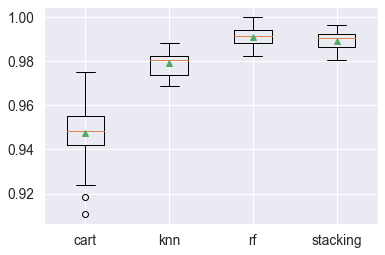

In [32]:
from numpy import mean
from numpy import std
results, names = list(), list()
for name, model in models.items():
    scores =evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name,mean(scores),std(scores)))

# plot model performance for comparison - based on f1-score
plt.boxplot(results, labels=names, showmeans=True)
plt.show()